In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
df = pd.read_csv('S50_08012020.csv')
df.time = pd.to_datetime(df.time)
df.set_index('time', inplace=True)
df.drop(['complete'], axis=1, inplace=True)

In [20]:
df.head()

,open,high,low,close,volume
time,,,,,
2006-04-28,536.5,542.0,535.6,536.2,152
2006-05-02,536.0,537.2,536.0,536.1,53
2006-05-03,537.0,538.5,537.0,538.5,75
2006-05-04,536.8,536.8,535.6,535.7,81
2006-05-08,536.5,542.0,536.5,541.0,109


In [21]:
import ta

In [22]:
df['rsi'] = ta.momentum.rsi(df['close'], n=14, fillna=True)

In [25]:
df['entry'] = df['rsi'] <= 30

In [26]:
df['exit'] = df['rsi'] >= 70

# Method 1 - For Loop

In [31]:
position = True
signal = list()

for i in range(0, df.shape[0]):
    
    # If we have a position :-
    # 1. continue to hold position if the next exit is False <-- no change
    # 2. if exit is True, close the position <-- change
    if (position == True):
        if df.iloc[i]['exit'] == True:
            position = False
    
    # If we DON'T have a position
    # 1. continue to hold NO position if the next exit is True or entry is False <-- no change
    # 2. if entry is True and exit is False, then open a position <-- change
    elif (position == False):
        if (df.iloc[i]['entry'] == True) & (df.iloc[i]['exit'] == False):
            position = True
    
    signal.append(position)

In [32]:
signal

[False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 Fals

In [33]:
df['signal'] = signal

In [34]:
df

,open,high,low,close,volume,rsi,entry,exit,signal
time,,,,,,,,,
2006-04-28,536.5,542.0,535.6,536.2,152,100.000000,False,True,False
2006-05-02,536.0,537.2,536.0,536.1,53,0.000000,True,False,True
2006-05-03,537.0,538.5,537.0,538.5,75,96.275072,False,True,False
2006-05-04,536.8,536.8,535.6,535.7,81,43.571072,False,False,False
2006-05-08,536.5,542.0,536.5,541.0,109,73.331230,False,True,False
...,...,...,...,...,...,...,...,...,...
2019-12-30,1070.5,1071.7,1066.5,1067.0,5095,49.771576,False,False,True
2020-01-02,1065.2,1079.3,1065.0,1076.7,9798,55.134034,False,False,True
2020-01-03,1075.0,1081.7,1073.5,1075.4,10009,54.297373,False,False,True


In [35]:
import DeeperTradeLibrary

In [37]:
DeeperTradeLibrary.Backtest.trade_simulation(df.reset_index())

,type,open_time,open_price,close_time,close_price,length,pnl,equity
0,True,2006-05-02,536.1,2006-05-03,538.5,1,24.0,24.0
1,True,2006-05-18,518.5,2006-10-25,515.5,108,-30.0,-6.0
2,True,2006-12-19,461.0,2007-05-02,504.7,89,437.0,431.0
3,True,2007-08-16,518.9,2007-10-09,642.8,38,1239.0,1670.0
4,True,2008-01-24,521.0,2008-05-16,635.3,75,1143.0,2813.0
5,True,2008-06-13,558.5,2009-04-30,343.3,215,-2152.0,661.0
6,True,2010-01-27,481.5,2010-03-16,534.9,33,534.0,1195.0
7,True,2011-09-26,628.4,2012-02-03,766.3,89,1379.0,2574.0
8,True,2012-05-23,768.3,2012-09-14,875.8,79,1075.0,3649.0
9,True,2013-06-13,931.0,2014-04-21,958.3,209,273.0,3922.0


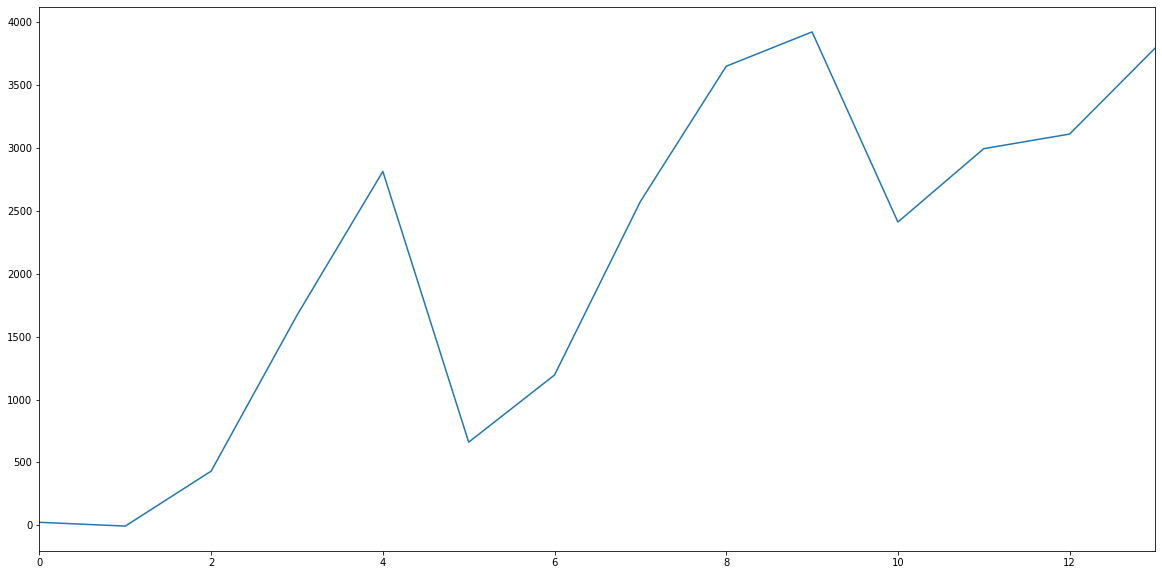

In [38]:
DeeperTradeLibrary.Backtest.trade_simulation(df.reset_index())['equity'].plot(figsize=(20,10))

# Method 2 - Vectorize

In [39]:
df.drop(['signal'], axis=1, inplace=True)

In [48]:
df['entry'].replace(False, np.nan)

time
2006-04-28    NaN
2006-05-02    1.0
2006-05-03    NaN
2006-05-04    NaN
2006-05-08    NaN
             ... 
2019-12-30    NaN
2020-01-02    NaN
2020-01-03    NaN
2020-01-06    NaN
2020-01-07    NaN
Name: entry, Length: 3345, dtype: float64

In [49]:
(df['exit'] == False).replace(True, np.nan)

time
2006-04-28    0.0
2006-05-02    NaN
2006-05-03    0.0
2006-05-04    NaN
2006-05-08    0.0
             ... 
2019-12-30    NaN
2020-01-02    NaN
2020-01-03    NaN
2020-01-06    NaN
2020-01-07    NaN
Name: exit, Length: 3345, dtype: float64

In [51]:
(df['exit'] == False).replace(True, np.nan).fillna(df['entry'].replace(False, np.nan))

time
2006-04-28    0.0
2006-05-02    1.0
2006-05-03    0.0
2006-05-04    NaN
2006-05-08    0.0
             ... 
2019-12-30    NaN
2020-01-02    NaN
2020-01-03    NaN
2020-01-06    NaN
2020-01-07    NaN
Name: exit, Length: 3345, dtype: float64

In [54]:
(df['exit'] == False).replace(True, np.nan).fillna(df['entry'].replace(False, np.nan)).fillna(method='ffill')

time
2006-04-28    0.0
2006-05-02    1.0
2006-05-03    0.0
2006-05-04    0.0
2006-05-08    0.0
             ... 
2019-12-30    1.0
2020-01-02    1.0
2020-01-03    1.0
2020-01-06    1.0
2020-01-07    1.0
Name: exit, Length: 3345, dtype: float64

In [55]:
(df['exit'] == False).replace(True, np.nan).fillna(df['entry'].replace(False, np.nan)).fillna(method='ffill').fillna(0)

time
2006-04-28    0.0
2006-05-02    1.0
2006-05-03    0.0
2006-05-04    0.0
2006-05-08    0.0
             ... 
2019-12-30    1.0
2020-01-02    1.0
2020-01-03    1.0
2020-01-06    1.0
2020-01-07    1.0
Name: exit, Length: 3345, dtype: float64

In [56]:
(df['exit'] == False).replace(True, np.nan).fillna(df['entry'].replace(False, np.nan)).fillna(method='ffill').fillna(0).astype('bool')

time
2006-04-28    False
2006-05-02     True
2006-05-03    False
2006-05-04    False
2006-05-08    False
              ...  
2019-12-30     True
2020-01-02     True
2020-01-03     True
2020-01-06     True
2020-01-07     True
Name: exit, Length: 3345, dtype: bool

In [57]:
df['signal'] = (df['exit'] == False).replace(True, np.nan).fillna(df['entry'].replace(False, np.nan)).fillna(method='ffill').fillna(0).astype('bool')

In [59]:
DeeperTradeLibrary.Backtest.trade_simulation(df.reset_index())

,type,open_time,open_price,close_time,close_price,length,pnl,equity
0,True,2006-05-02,536.1,2006-05-03,538.5,1,24.0,24.0
1,True,2006-05-18,518.5,2006-10-25,515.5,108,-30.0,-6.0
2,True,2006-12-19,461.0,2007-05-02,504.7,89,437.0,431.0
3,True,2007-08-16,518.9,2007-10-09,642.8,38,1239.0,1670.0
4,True,2008-01-24,521.0,2008-05-16,635.3,75,1143.0,2813.0
5,True,2008-06-13,558.5,2009-04-30,343.3,215,-2152.0,661.0
6,True,2010-01-27,481.5,2010-03-16,534.9,33,534.0,1195.0
7,True,2011-09-26,628.4,2012-02-03,766.3,89,1379.0,2574.0
8,True,2012-05-23,768.3,2012-09-14,875.8,79,1075.0,3649.0
9,True,2013-06-13,931.0,2014-04-21,958.3,209,273.0,3922.0


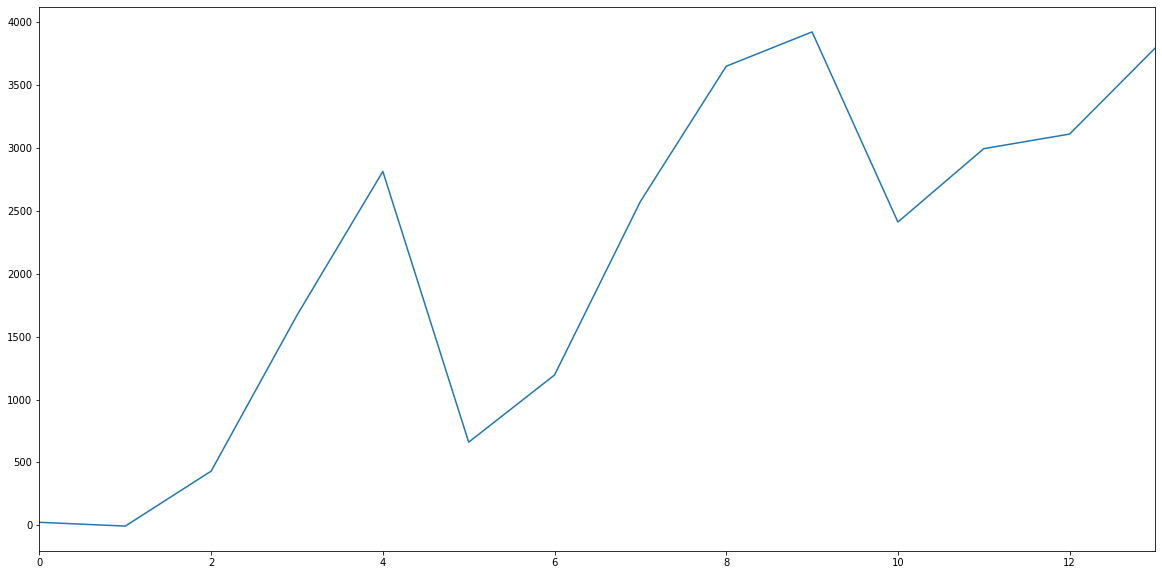

In [58]:
DeeperTradeLibrary.Backtest.trade_simulation(df.reset_index())['equity'].plot(figsize=(20,10))